In [7]:
import pandas as pd

# Load the CSV files into separate Pandas DataFrames
sales_data_path = 'Sales_Shipment_Data.csv'
inventory_data_path = 'Inventory_Stock_Data.csv'

# Reading the data
sales_data = pd.read_csv(sales_data_path)
inventory_data = pd.read_csv(inventory_data_path)

# Check for missing values in sales data
sales_missing_values = sales_data.isnull().sum()

# Check for missing values in inventory data
inventory_missing_values = inventory_data.isnull().sum()

# Display the missing values information
print("Missing values in Sales Data:\n", sales_missing_values)
print("\nMissing values in Inventory Data:\n", inventory_missing_values)


Missing values in Sales Data:
 Product Category Id              0
Category Name                    0
Class                            0
Customer City                    0
Customer Country                 0
Customer Fname                   0
Customer Id                      0
Customer Lname                   8
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 3
Delivery Status                  0
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
order date (DateOrders)          0
Order Id                         0
Order Region                     0
Order State                      0
Order Status                     0
Product Id                       0
Product Name                     0
shipping date (DateOrders)       0
Shipping Mode                    0
Type                    

Data types in Sales Data:
 Product Category Id                int64
Category Name                     object
Class                             object
Customer City                     object
Customer Country                  object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Delivery Status                   object
Department Id                      int64
Department Name                   object
Market                            object
Order City                        object
Order Country                     object
order date (DateOrders)           object
Order Id                           int64
Order Region                      object
Order State                       object
Order Status                      object
Product Id                    

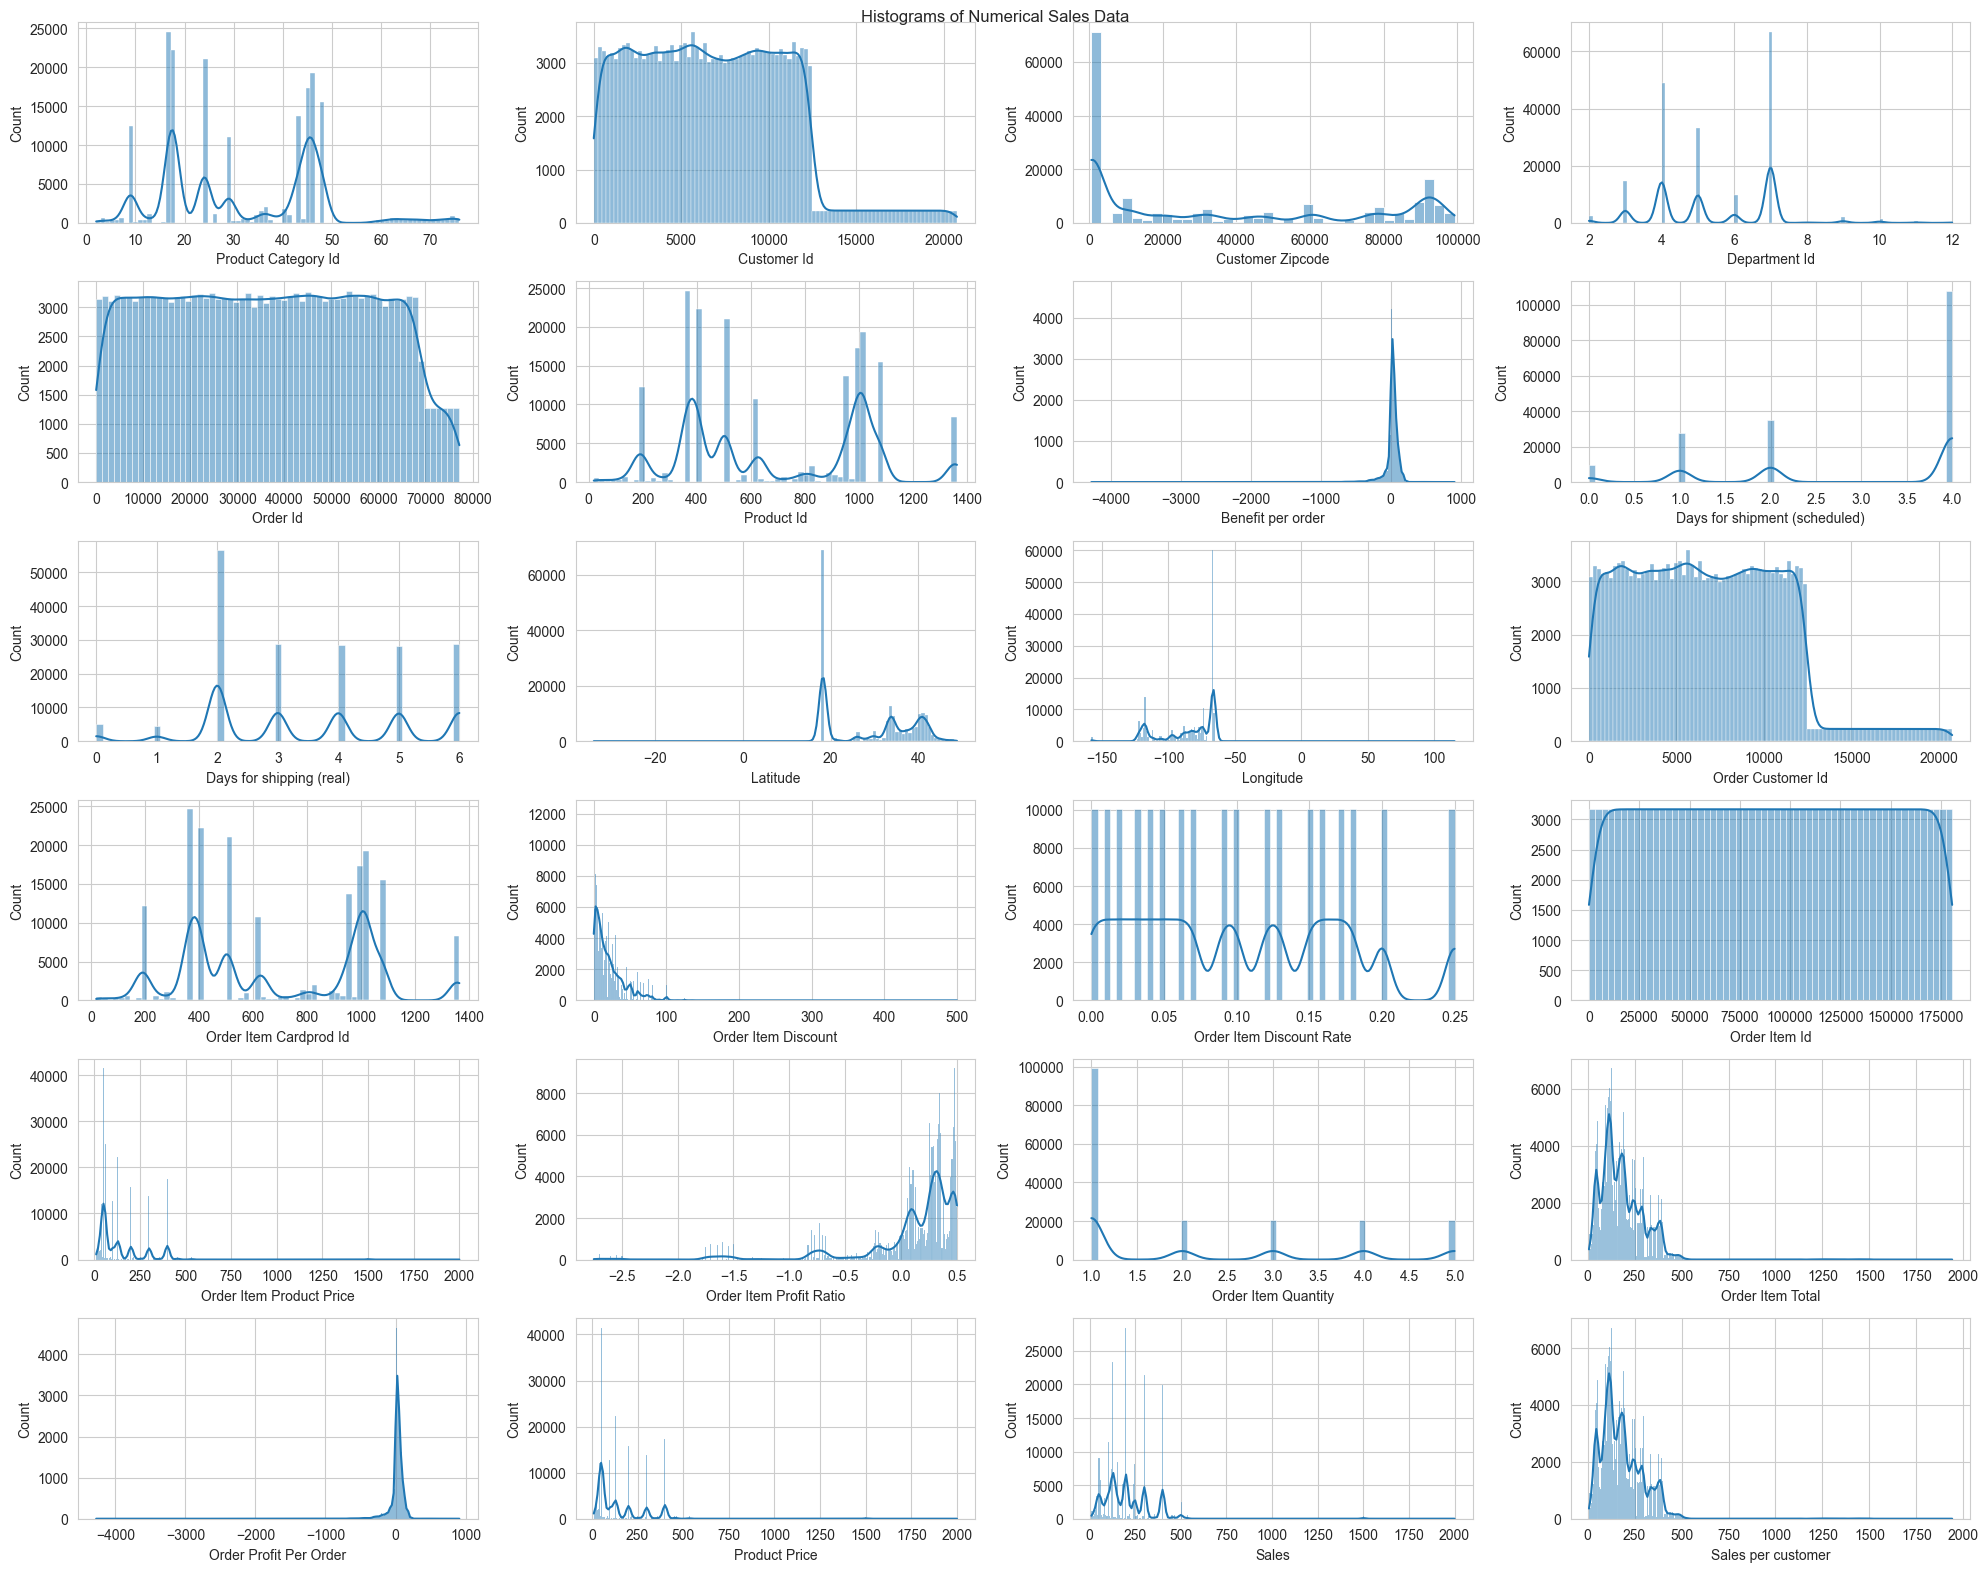

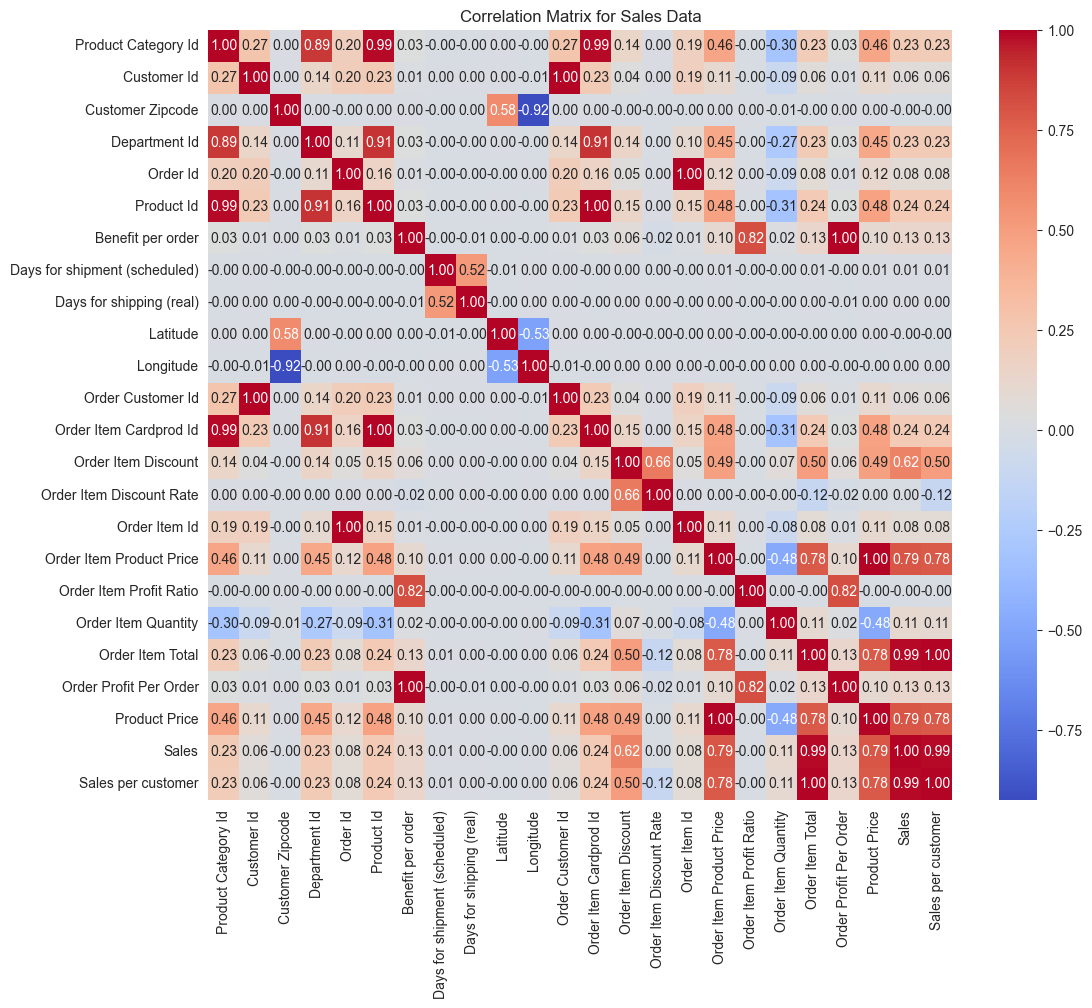

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Overview of the data types in each DataFrame
print("Data types in Sales Data:\n", sales_data.dtypes)

# Selecting numerical and categorical columns for tailored analysis
numerical_sales = sales_data.select_dtypes(include=[np.number])
categorical_sales = sales_data.select_dtypes(exclude=[np.number])

# Summary statistics for numerical data
print("\nSummary statistics for numerical Sales Data:\n", numerical_sales.describe())

# Visualizing distributions of key numerical variables in sales data
# Calculate the number of rows and columns needed for subplots
num_cols = 4
num_rows = len(numerical_sales.columns) // num_cols 
num_rows += len(numerical_sales.columns) % num_cols

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 16))
fig.suptitle('Histograms of Numerical Sales Data')

# Plot each histogram on a separate subplot
for i, col in enumerate(numerical_sales.columns):
    sns.histplot(numerical_sales[col], ax=axes[i//num_cols, i%num_cols], kde=True)

plt.tight_layout()

# Correlation matrix for sales data
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_sales.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix for Sales Data")

plt.show()


Data types in Inventory Data:
 order-now        object
product id        int64
product name     object
avg lead time     int64
avg order qty     int64
current stock     int64
max lead time     int64
max order qty     int64
mod               int64
reorder point     int64
safety stock      int64
dtype: object

Summary statistics for numerical Inventory Data:
         product id  avg lead time  avg order qty  current stock  \
count   118.000000          118.0     118.000000     118.000000   
mean    689.576271           10.0       2.084746     160.720339   
std     403.120380            0.0       1.000652     115.003819   
min      19.000000           10.0       1.000000      35.000000   
25%     303.500000           10.0       1.000000      63.000000   
50%     729.000000           10.0       3.000000     175.000000   
75%     905.750000           10.0       3.000000     321.000000   
max    1363.000000           10.0       3.000000     330.000000   

       max lead time  max order qty

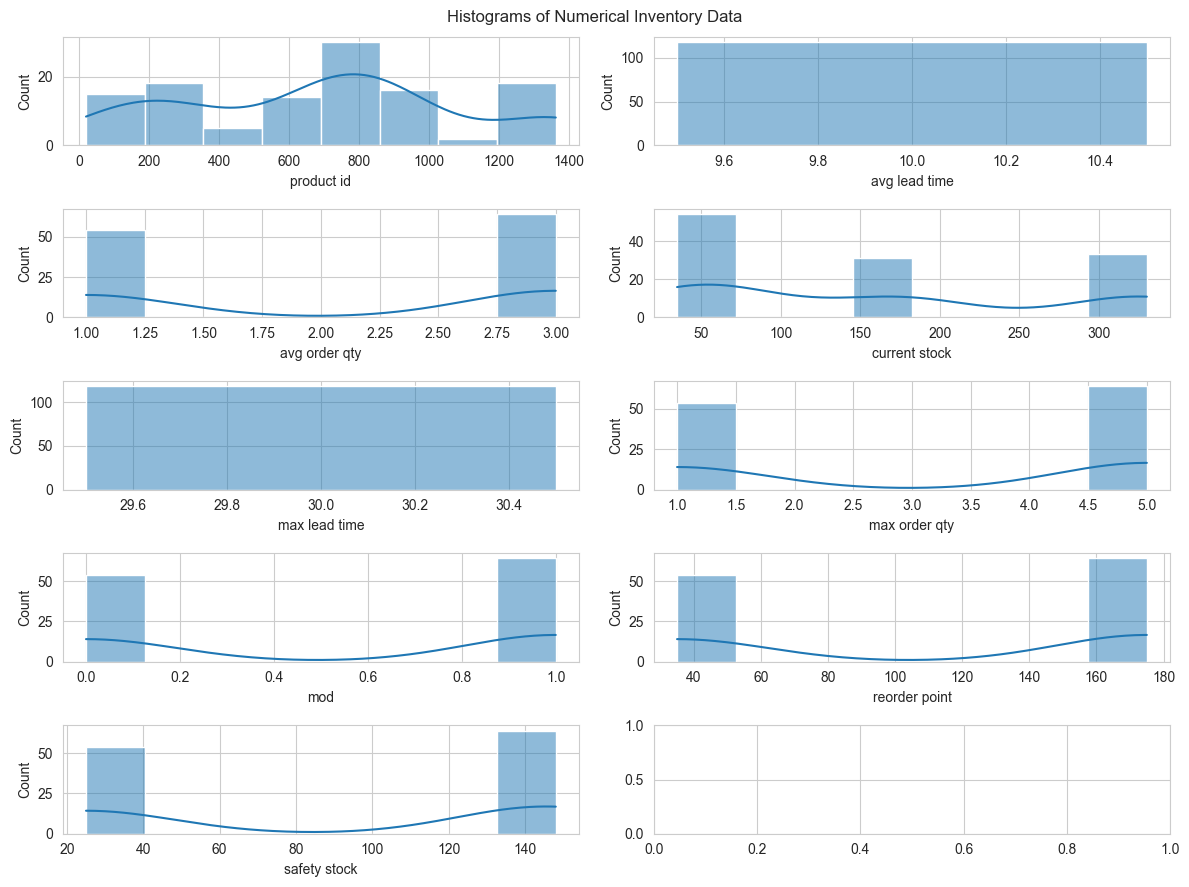

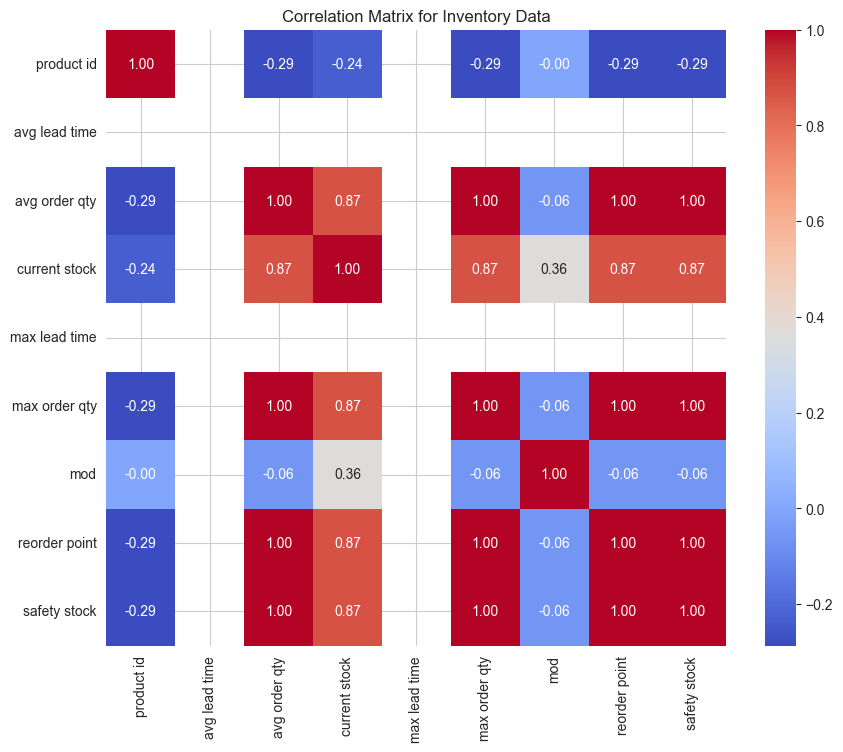

In [9]:
# Overview of the data types in each DataFrame
print("\nData types in Inventory Data:\n", inventory_data.dtypes)

# Selecting numerical and categorical columns for tailored analysis
numerical_inventory = inventory_data.select_dtypes(include=[np.number])
categorical_inventory = inventory_data.select_dtypes(exclude=[np.number])

# Summary statistics for numerical data
print("\nSummary statistics for numerical Inventory Data:\n", numerical_inventory.describe())

# Visualizing distributions of key numerical variables in inventory data
# Calculate the number of rows and columns needed for subplots
num_cols = 2
num_rows = len(numerical_inventory.columns) // num_cols 
num_rows += len(numerical_inventory.columns) % num_cols

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 9))
fig.suptitle('Histograms of Numerical Inventory Data')

# Plot each histogram on a separate subplot
for i, col in enumerate(numerical_inventory.columns):
    sns.histplot(numerical_inventory[col], ax=axes[i//num_cols, i%num_cols], kde=True)

plt.tight_layout()

# Correlation matrix for inventory data
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_inventory.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix for Inventory Data")

plt.show()

C:\Users\sandi\AppData\Local\Temp\ipykernel_9592\190897010.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = sales_data['Sales'].resample('M').sum()


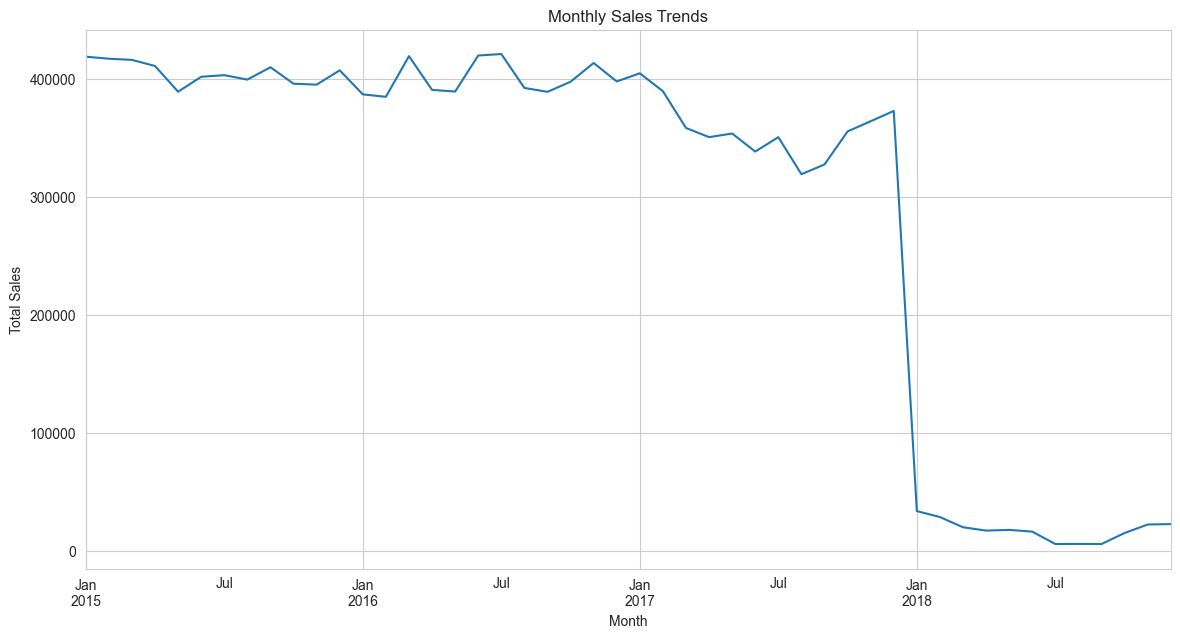

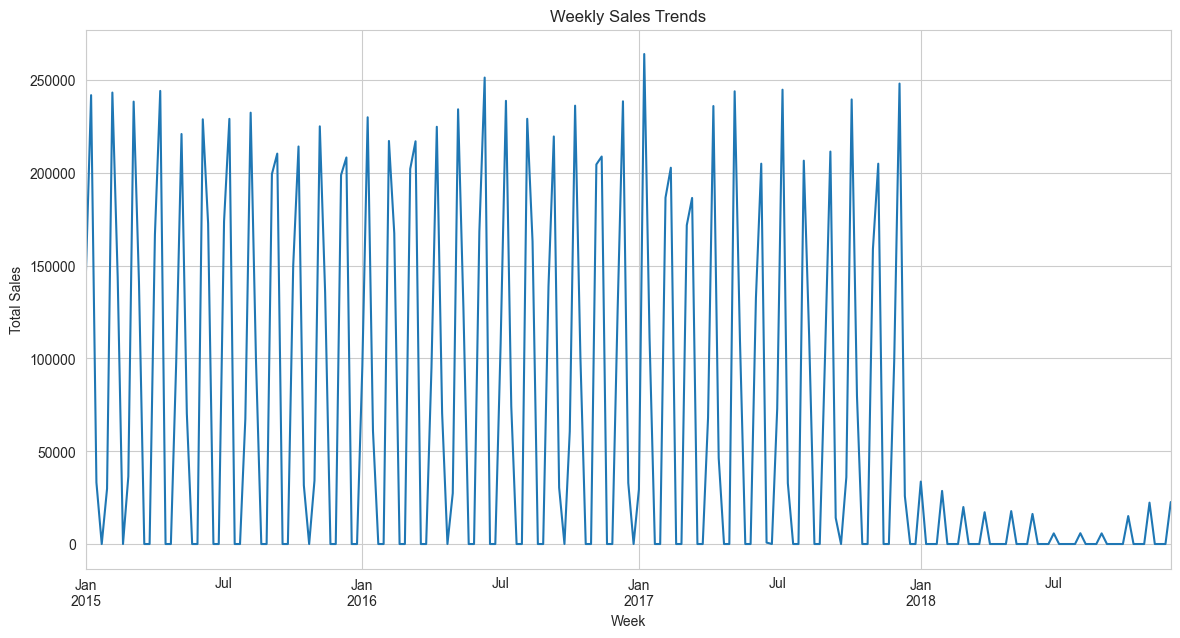

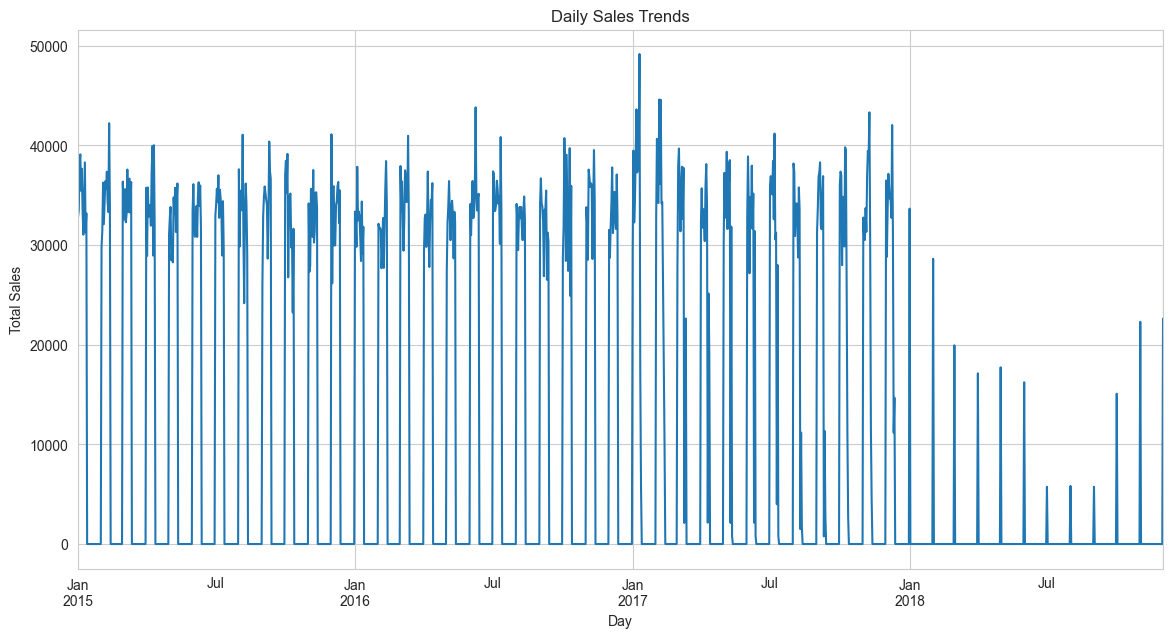

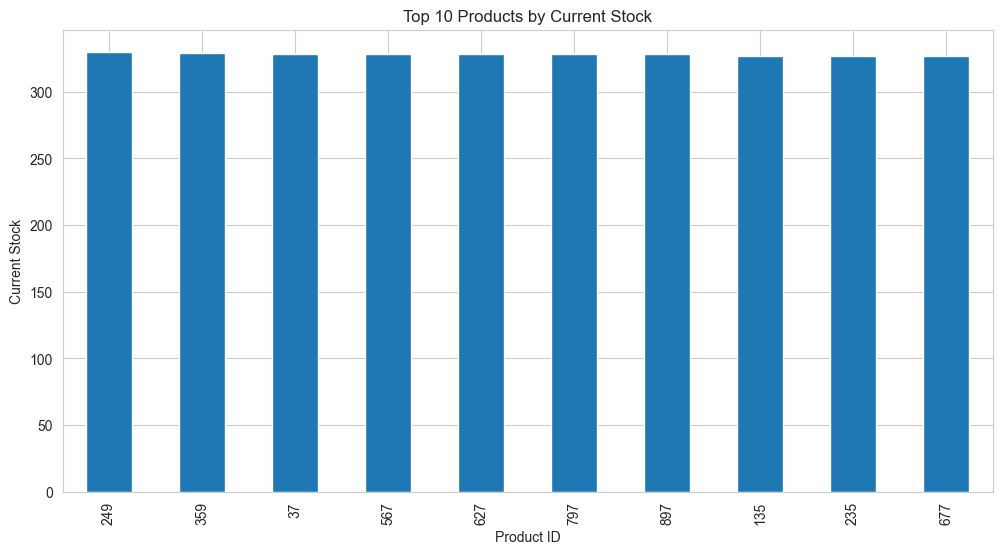

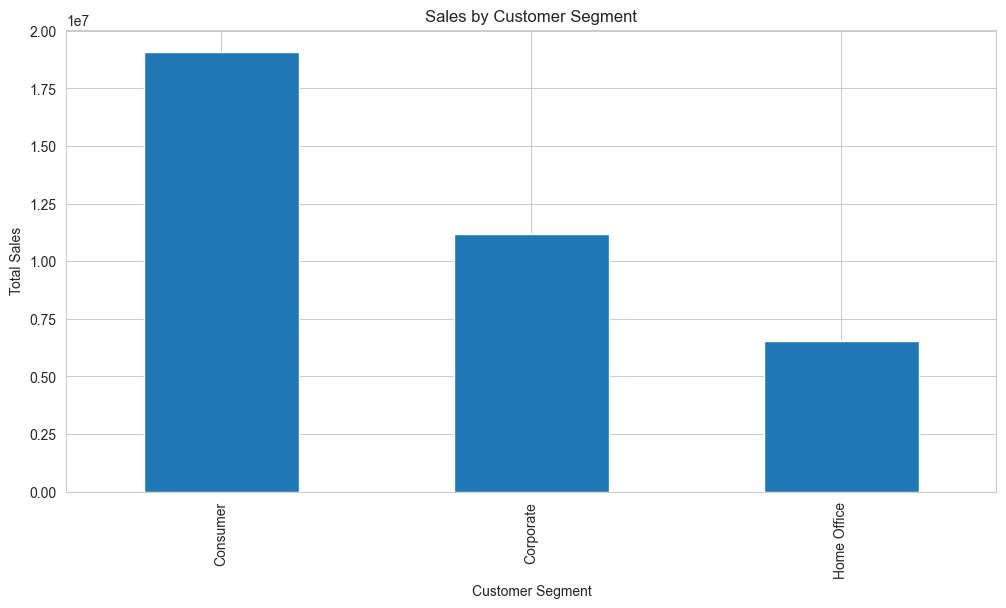

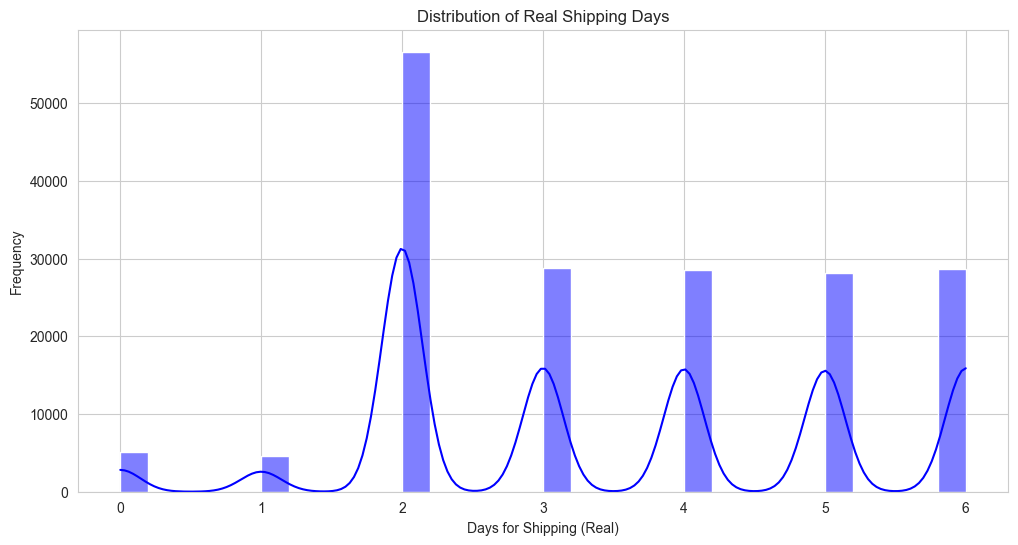

In [10]:
# Adjusting the date format to match the dataset
sales_data['order date (DateOrders)'] = pd.to_datetime(sales_data['order date (DateOrders)'], format='%d/%m/%y %H:%M', errors='coerce')

# Replotting the sales trends with the corrected date parsing
sales_data.set_index('order date (DateOrders)', inplace=True)

# Monthly sales trends
monthly_sales = sales_data['Sales'].resample('M').sum()
plt.figure(figsize=(14, 7))
monthly_sales.plot(title='Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Weekly sales trends
weekly_sales = sales_data['Sales'].resample('W').sum()
plt.figure(figsize=(14, 7))
weekly_sales.plot(title='Weekly Sales Trends')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.show()

# Daily sales trends
daily_sales = sales_data['Sales'].resample('D').sum()
plt.figure(figsize=(14, 7))
daily_sales.plot(title='Daily Sales Trends')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.show()

# Re-analyzing inventory levels over time
inventory_data['current stock'] = inventory_data['current stock'].astype(float)
inventory_data['product id'] = inventory_data['product id'].astype(int)
inventory_data.set_index('product id', inplace=True)

# Top 10 products by current stock
top_stock_products = inventory_data['current stock'].nlargest(10)
plt.figure(figsize=(12, 6))
top_stock_products.plot(kind='bar', title='Top 10 Products by Current Stock')
plt.xlabel('Product ID')
plt.ylabel('Current Stock')
plt.show()

# Re-analyzing customer segments
customer_segmentation = sales_data.groupby('Customer Segment')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
customer_segmentation.plot(kind='bar', title='Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()

# Re-analyzing order characteristics
order_lead_times = sales_data.groupby('Order Item Id')['Days for shipping (real)'].mean()
plt.figure(figsize=(12, 6))
sns.histplot(order_lead_times, bins=30, kde=True, color='blue')
plt.title('Distribution of Real Shipping Days')
plt.xlabel('Days for Shipping (Real)')
plt.ylabel('Frequency')
plt.show()


In [11]:
import pandas as pd

# Load datasets
sales_shipment_file = "Sales_Shipment_Data.csv"
inventory_stock_file = "Inventory_Stock_Data.csv"

sales_shipment_df = pd.read_csv(sales_shipment_file)
inventory_stock_df = pd.read_csv(inventory_stock_file)

# --- Exploratory Data Analysis (EDA) ---

# Check for missing values
missing_values_sales = sales_shipment_df.isnull().sum()
missing_values_inventory = inventory_stock_df.isnull().sum()

# Summary statistics
sales_summary = sales_shipment_df.describe()
inventory_summary = inventory_stock_df.describe()

# Unique product count
unique_products_sales = sales_shipment_df["Product Id"].nunique()
unique_products_inventory = inventory_stock_df["product id"].nunique()

# --- Data Merging ---
# Merge on 'Product Id' from sales and 'product id' from inventory
merged_df = sales_shipment_df.merge(
    inventory_stock_df, left_on="Product Id", right_on="product id", how="left"
)

# Save the merged dataset
merged_file_path = "Merged_Sales_Inventory.csv"
merged_df.to_csv(merged_file_path, index=False)

# Display Results
results = {
    "Missing Values (Sales)": missing_values_sales,
    "Missing Values (Inventory)": missing_values_inventory,
    "Sales Data Summary": sales_summary,
    "Inventory Data Summary": inventory_summary,
    "Unique Products (Sales)": unique_products_sales,
    "Unique Products (Inventory)": unique_products_inventory,
    "Merged Dataset Sample": merged_df.head()
}

print(results)

{'Missing Values (Sales)': Product Category Id              0
Category Name                    0
Class                            0
Customer City                    0
Customer Country                 0
Customer Fname                   0
Customer Id                      0
Customer Lname                   8
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 3
Delivery Status                  0
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
order date (DateOrders)          0
Order Id                         0
Order Region                     0
Order State                      0
Order Status                     0
Product Id                       0
Product Name                     0
shipping date (DateOrders)       0
Shipping Mode                    0
Type                        

## Inventory Data
Column: current stock
Represents the available stock for products at different time periods.
Helps track stock levels over months, weeks, and years to avoid overstocking or stockouts.
Can be used to analyze trends in inventory replenishment and product demand.

## Sales Data

Column: Sales
Represents the revenue or units sold for a product over time.
Helps identify seasonal patterns in sales (high-demand and low-demand periods).
Used for forecasting future sales and optimizing stock levels.

## Key Insights from the Analysis
### Sales Trends
Yearly, Monthly, and Weekly sales trends reveal how sales fluctuate over time.
Helps understand which periods have higher or lower sales.

### Inventory Trends
Yearly, Monthly, and Weekly inventory trends show how stock levels change.
Helps identify when stock replenishment occurs and if inventory levels are aligned with sales.

### Relationship Between Inventory & Sales
A scatterplot and correlation analysis determine if there's a relationship between stock levels and sales.
A strong positive correlation suggests that higher inventory leads to more sales, while a negative correlation may indicate overstocking issues.
Would you like me to perform any additional analyses, such as demand forecasting or stock optimization recommendations? 🚀

   Product Category Id    Category Name                           Class  \
0                   24  Women's Apparel  Moderate Value-Moderate Number   
1                   24  Women's Apparel  Moderate Value-Moderate Number   
2                   24  Women's Apparel  Moderate Value-Moderate Number   
3                   24  Women's Apparel  Moderate Value-Moderate Number   
4                   24  Women's Apparel  Moderate Value-Moderate Number   

     Customer City Customer Country Customer Fname  Customer Id  \
0          Roswell          EE. UU.           Jean         5673   
1      Los Angeles          EE. UU.           Rose         9723   
2           Harvey          EE. UU.         Joshua         9511   
3         Elmhurst          EE. UU.           Mary         3326   
4  North Las Vegas          EE. UU.       Samantha          907   

  Customer Lname Customer Segment Customer State  ... product id  \
0           Dunn        Corporate             NM  ...        502   
1         

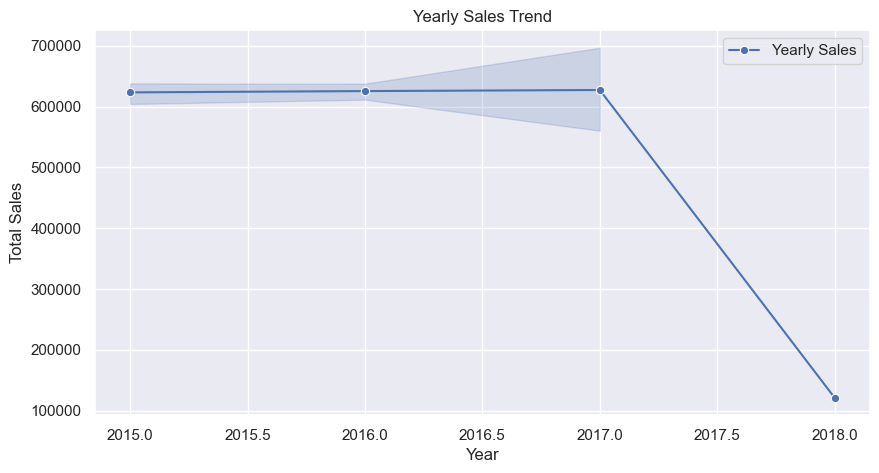

C:\Users\sandi\AppData\Local\Temp\ipykernel_9592\2276951232.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales['month'], y=monthly_sales['Sales'], palette='coolwarm')


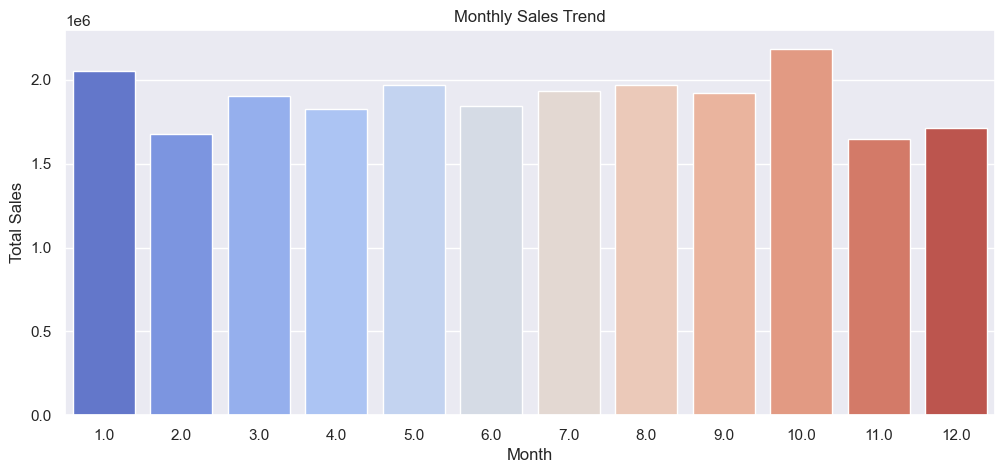

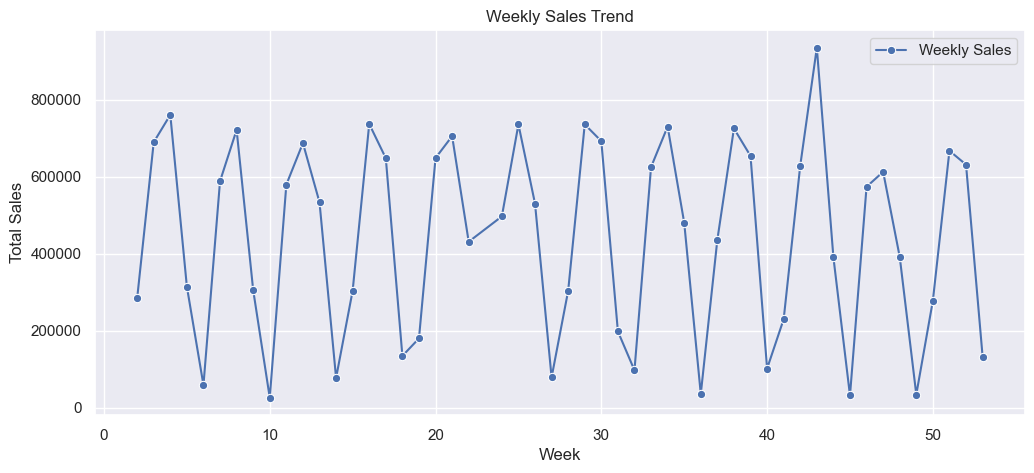

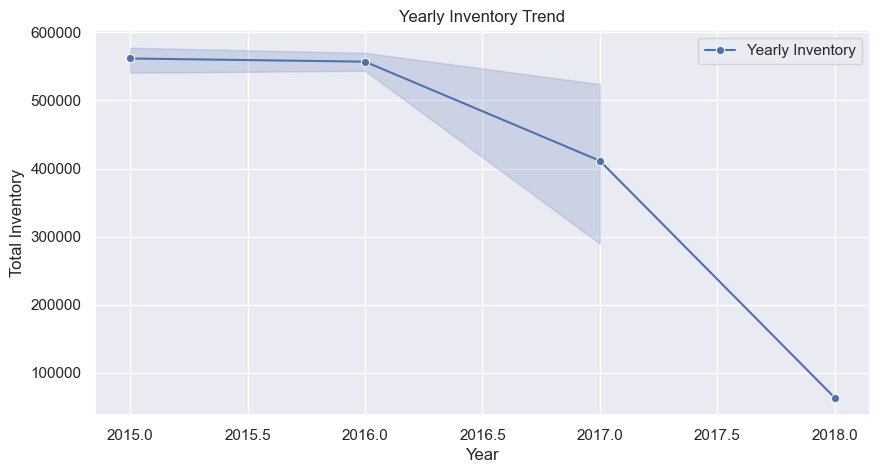

C:\Users\sandi\AppData\Local\Temp\ipykernel_9592\2276951232.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_inventory['month'], y=monthly_inventory['current stock'], palette='viridis')


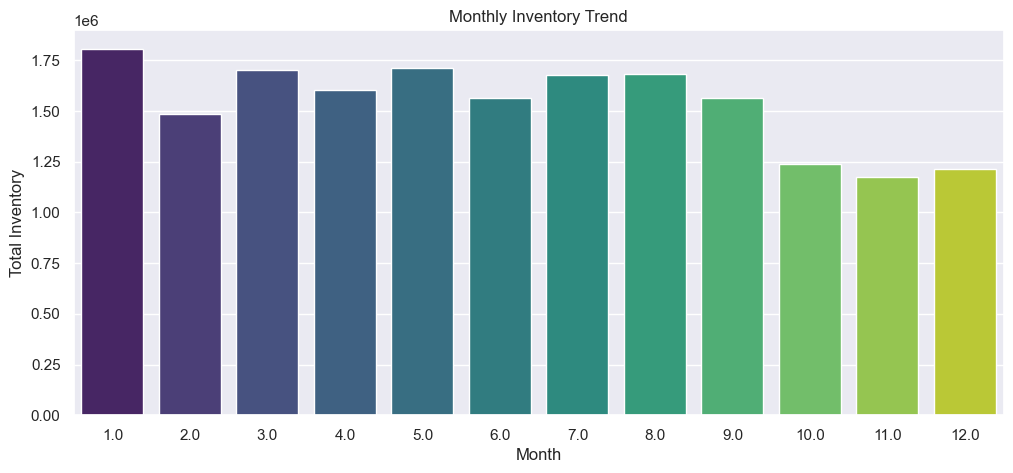

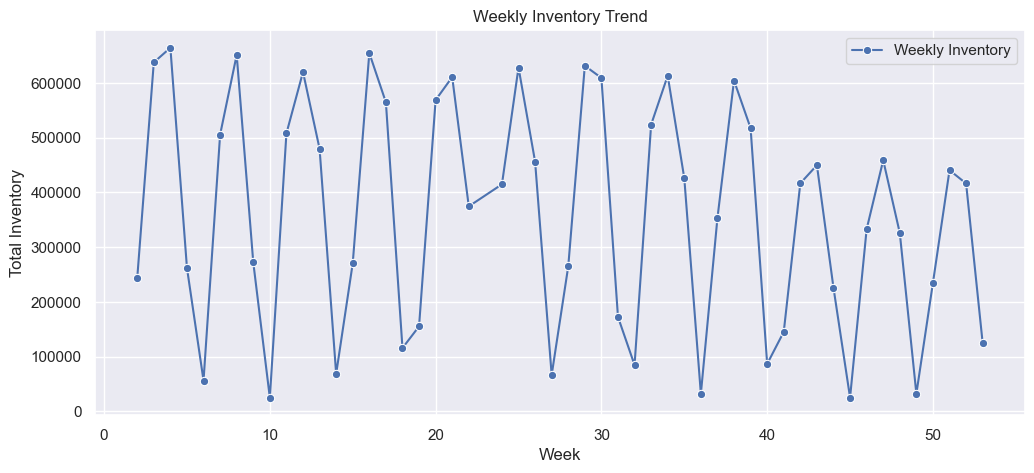

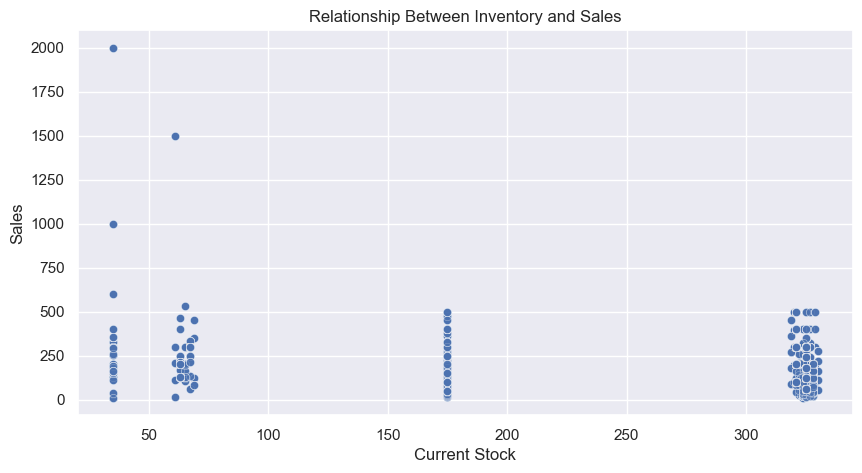

Correlation between Inventory and Sales: -0.24740760226056205


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Merged_Sales_Inventory.csv")

# Display first few rows and shape of dataset
print(df.head())
print("Dataset Shape:", df.shape)

# Rename date column for easier access
df.rename(columns={'order date (DateOrders)': 'order_date'}, inplace=True)

# Convert to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Extract time-based features
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['week'] = df['order_date'].dt.isocalendar().week
df['weekday'] = df['order_date'].dt.day_name()

# Display updated dataframe with new features
print(df[['order_date', 'year', 'month', 'week', 'weekday']].head())

# Set plot style
sns.set_theme(style="darkgrid")

# Sales Trends (Yearly, Monthly, Weekly)
if 'Sales' in df.columns:
    sales_trends = df.groupby(['year', 'month'])['Sales'].sum().reset_index()
    
    # Yearly Sales Trend
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=sales_trends, x='year', y='Sales', marker='o', label='Yearly Sales')
    plt.title('Yearly Sales Trend')
    plt.xlabel('Year')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.show()
    
    # Monthly Sales Trend
    plt.figure(figsize=(12, 5))
    monthly_sales = df.groupby('month')['Sales'].sum().reset_index()
    sns.barplot(x=monthly_sales['month'], y=monthly_sales['Sales'], palette='coolwarm')
    plt.title('Monthly Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.show()
    
    # Weekly Sales Trend
    plt.figure(figsize=(12, 5))
    weekly_sales = df.groupby('week')['Sales'].sum().reset_index()
    sns.lineplot(x=weekly_sales['week'], y=weekly_sales['Sales'], marker='o', label='Weekly Sales')
    plt.title('Weekly Sales Trend')
    plt.xlabel('Week')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.show()

# Inventory Trends (Yearly, Monthly, Weekly)
if 'current stock' in df.columns:
    inventory_trends = df.groupby(['year', 'month'])['current stock'].sum().reset_index()
    
    # Yearly Inventory Trend
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=inventory_trends, x='year', y='current stock', marker='o', label='Yearly Inventory')
    plt.title('Yearly Inventory Trend')
    plt.xlabel('Year')
    plt.ylabel('Total Inventory')
    plt.legend()
    plt.show()
    
    # Monthly Inventory Trend
    plt.figure(figsize=(12, 5))
    monthly_inventory = df.groupby('month')['current stock'].sum().reset_index()
    sns.barplot(x=monthly_inventory['month'], y=monthly_inventory['current stock'], palette='viridis')
    plt.title('Monthly Inventory Trend')
    plt.xlabel('Month')
    plt.ylabel('Total Inventory')
    plt.show()
    
    # Weekly Inventory Trend
    plt.figure(figsize=(12, 5))
    weekly_inventory = df.groupby('week')['current stock'].sum().reset_index()
    sns.lineplot(x=weekly_inventory['week'], y=weekly_inventory['current stock'], marker='o', label='Weekly Inventory')
    plt.title('Weekly Inventory Trend')
    plt.xlabel('Week')
    plt.ylabel('Total Inventory')
    plt.legend()
    plt.show()

# Relationship between Inventory and Sales
if 'Sales' in df.columns and 'current stock' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x='current stock', y='Sales', alpha=0.5)
    plt.title('Relationship Between Inventory and Sales')
    plt.xlabel('Current Stock')
    plt.ylabel('Sales')
    plt.show()

    # Compute correlation
    correlation = df[['current stock', 'Sales']].corr().iloc[0, 1]
    print("Correlation between Inventory and Sales:", correlation)


C:\Users\sandi\AppData\Local\Temp\ipykernel_9592\3200453295.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['month'], y=df['Sales'], palette="coolwarm")


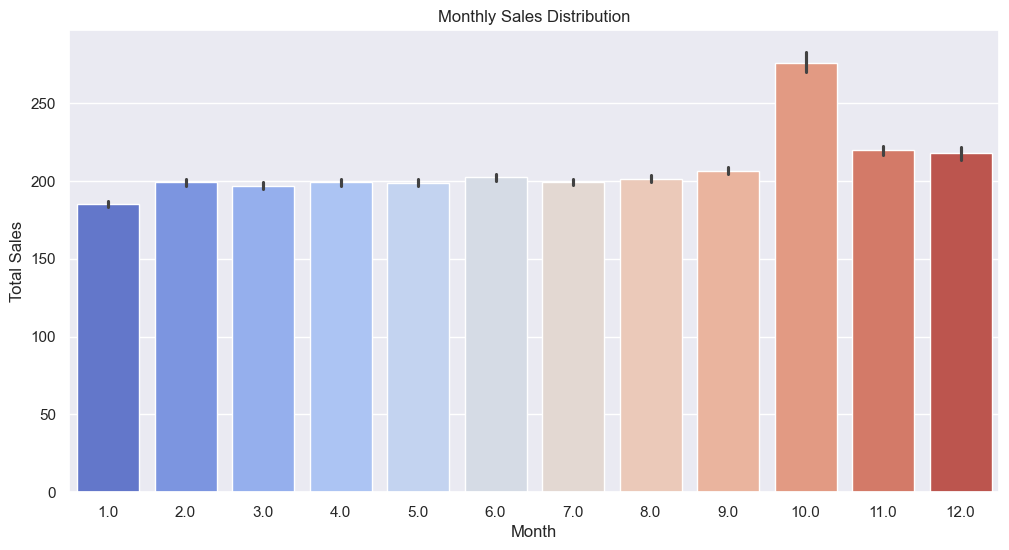

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['month'], y=df['Sales'], palette="coolwarm")
plt.title("Monthly Sales Distribution")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


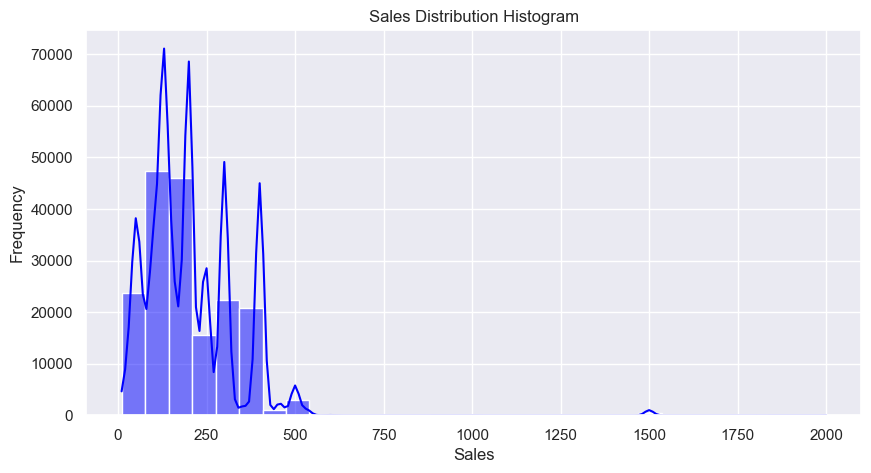

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Sales'], bins=30, kde=True, color='blue')
plt.title("Sales Distribution Histogram")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()



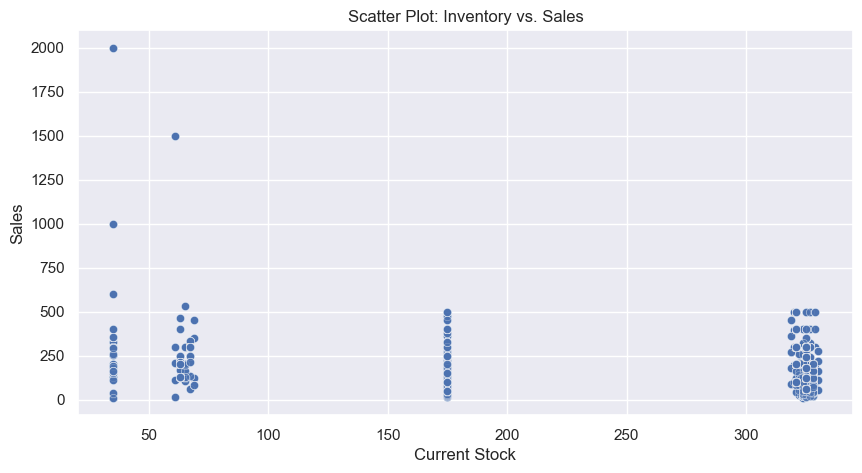

In [15]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='current stock', y='Sales', alpha=0.5)
plt.title("Scatter Plot: Inventory vs. Sales")
plt.xlabel("Current Stock")
plt.ylabel("Sales")
plt.show()


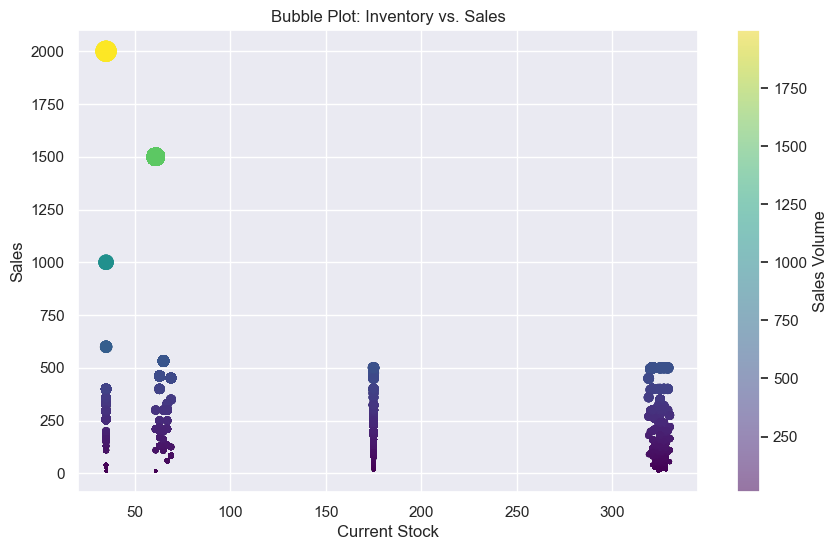

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df['current stock'], df['Sales'], s=df['Sales']*0.1, alpha=0.5, c=df['Sales'], cmap='viridis')
plt.colorbar(label="Sales Volume")
plt.title("Bubble Plot: Inventory vs. Sales")
plt.xlabel("Current Stock")
plt.ylabel("Sales")
plt.show()


C:\Users\sandi\AppData\Local\Temp\ipykernel_9592\3145466261.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['month'], y=df['Sales'], palette="Set2")


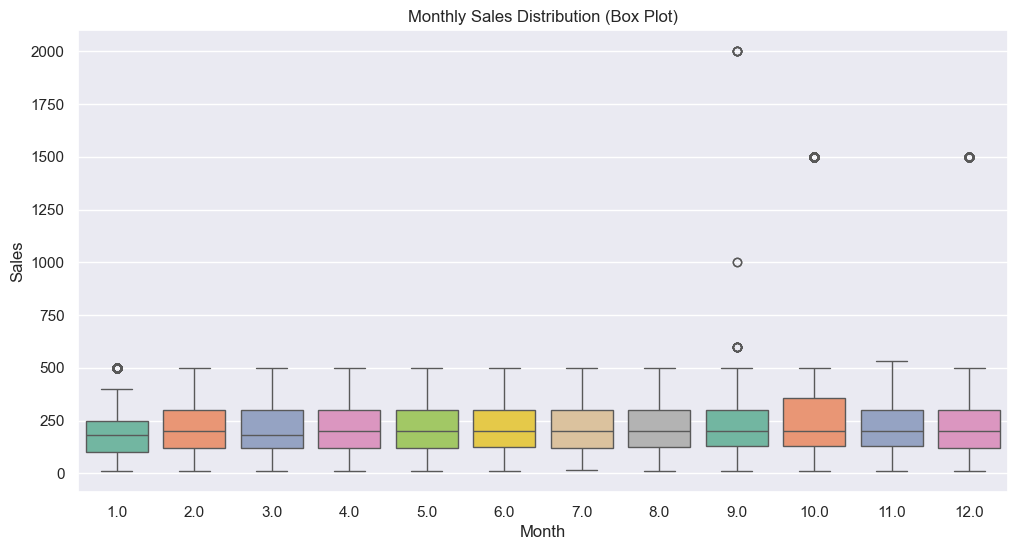

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['month'], y=df['Sales'], palette="Set2")
plt.title("Monthly Sales Distribution (Box Plot)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


C:\Users\sandi\AppData\Local\Temp\ipykernel_9592\1547150228.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['month'], y=df['Sales'], palette="coolwarm")


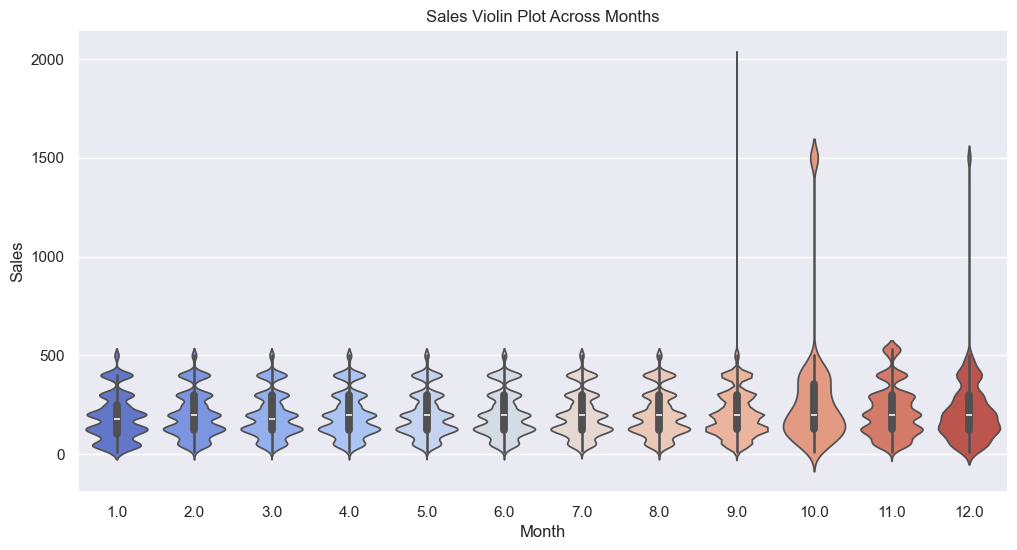

In [18]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=df['month'], y=df['Sales'], palette="coolwarm")
plt.title("Sales Violin Plot Across Months")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


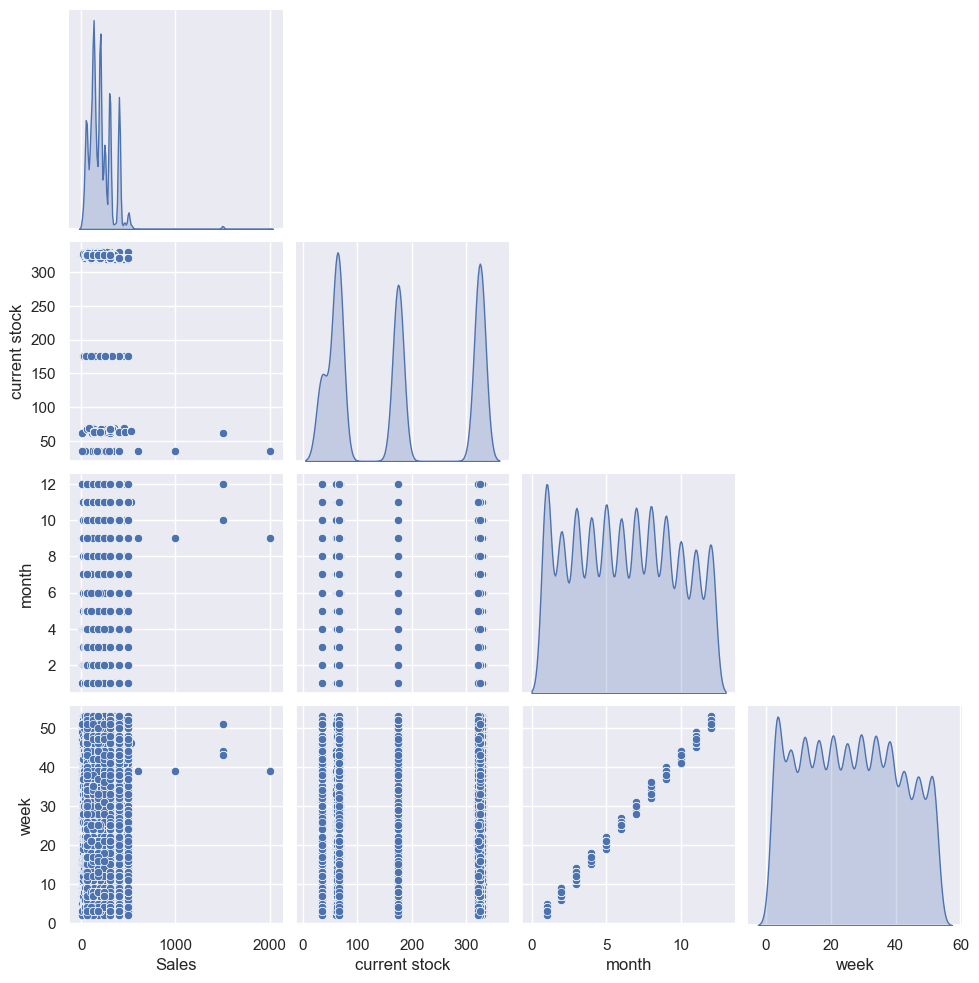

In [19]:
sns.pairplot(df[['Sales', 'current stock', 'month', 'week']], diag_kind='kde', corner=True)
plt.show()


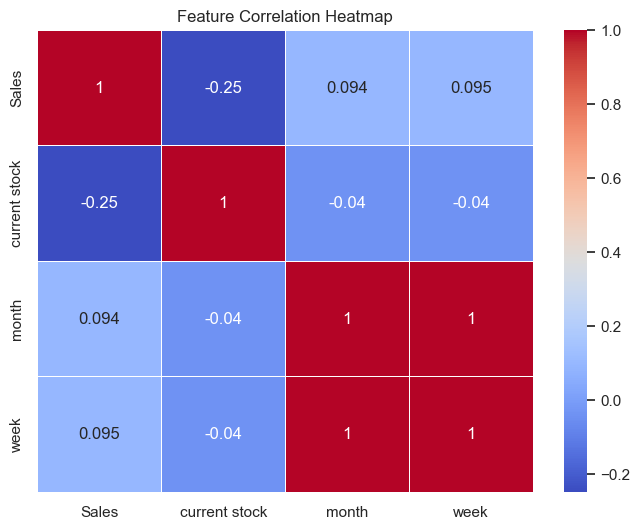

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Sales', 'current stock', 'month', 'week']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


C:\Users\sandi\AppData\Local\Temp\ipykernel_9592\4248035051.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Sales'], shade=True, color='green')


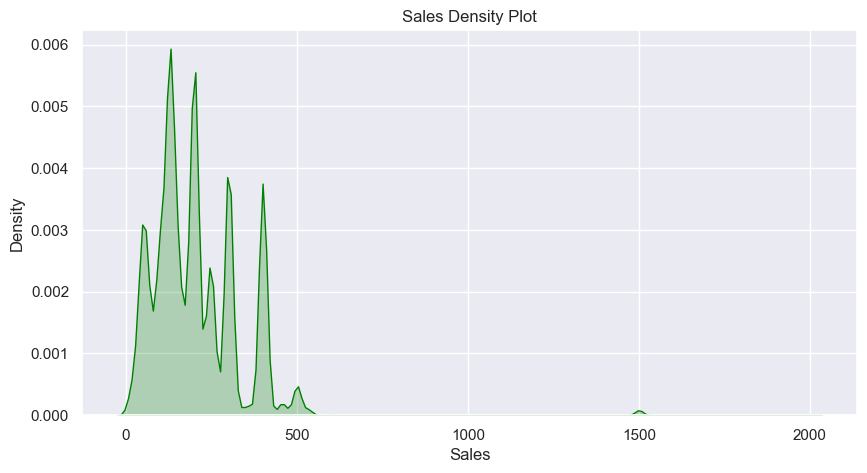

In [21]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Sales'], shade=True, color='green')
plt.title("Sales Density Plot")
plt.xlabel("Sales")
plt.ylabel("Density")
plt.show()


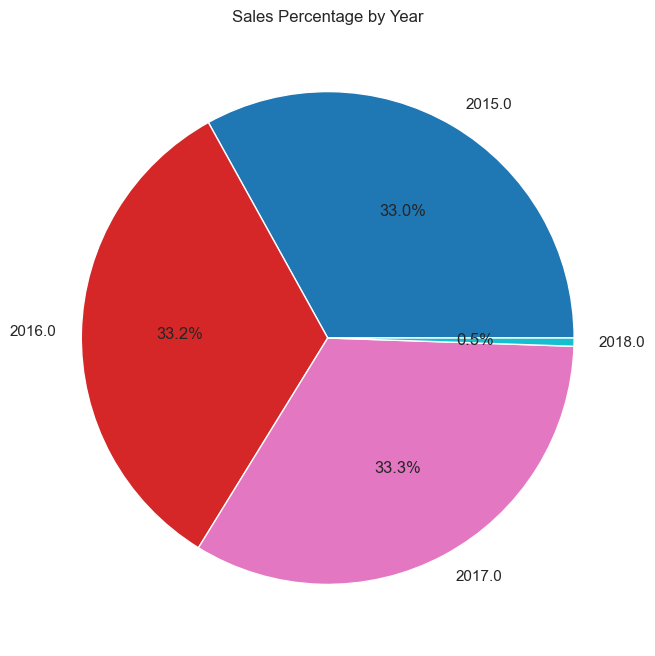

In [22]:
plt.figure(figsize=(8, 8))
df.groupby('year')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%', cmap='tab10')
plt.title("Sales Percentage by Year")
plt.ylabel("")  # Hide default label
plt.show()


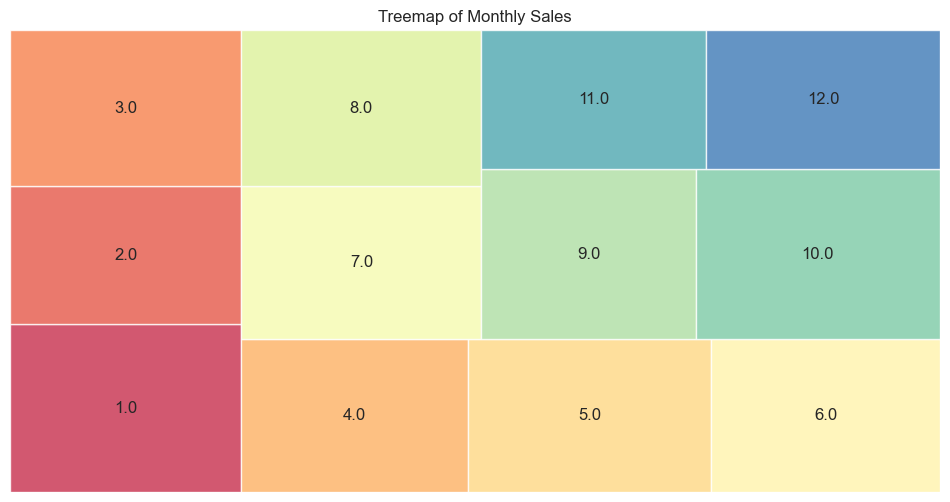

In [32]:
import squarify
monthly_sales = df.groupby("month")["Sales"].sum()
plt.figure(figsize=(12, 6))
squarify.plot(sizes=monthly_sales.values, label=monthly_sales.index, alpha=0.8, color=sns.color_palette("Spectral", len(monthly_sales)))
plt.title("Treemap of Monthly Sales")
plt.axis("off")
plt.show()


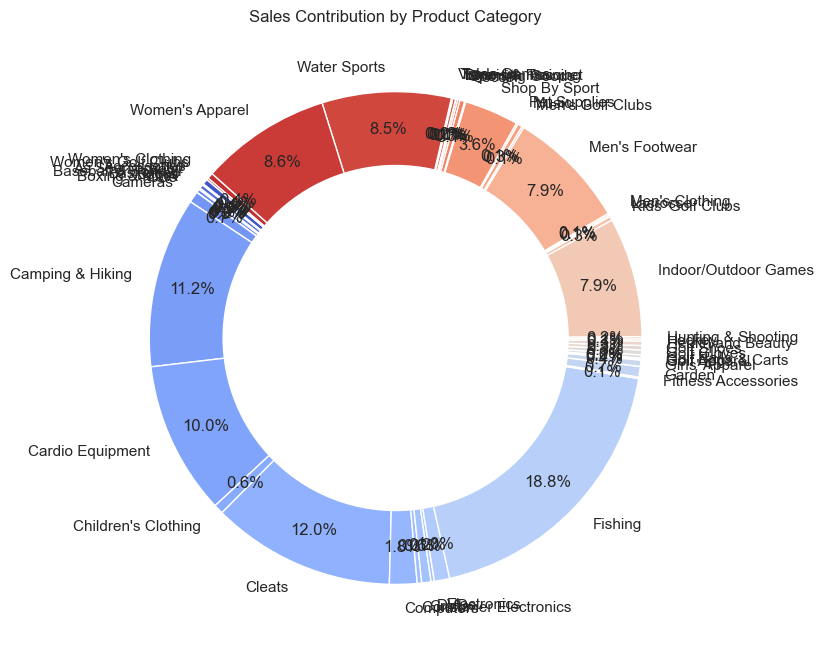

In [36]:
plt.figure(figsize=(8, 8))
category_sales = df.groupby('Category Name')['Sales'].sum()
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=sns.color_palette("coolwarm", len(category_sales)))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gcf().gca().add_artist(centre_circle)
plt.title("Sales Contribution by Product Category")
plt.show()


C:\Users\sandi\AppData\Local\Temp\ipykernel_9592\637972584.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df, x="Category Name", y="Sales", palette="muted")


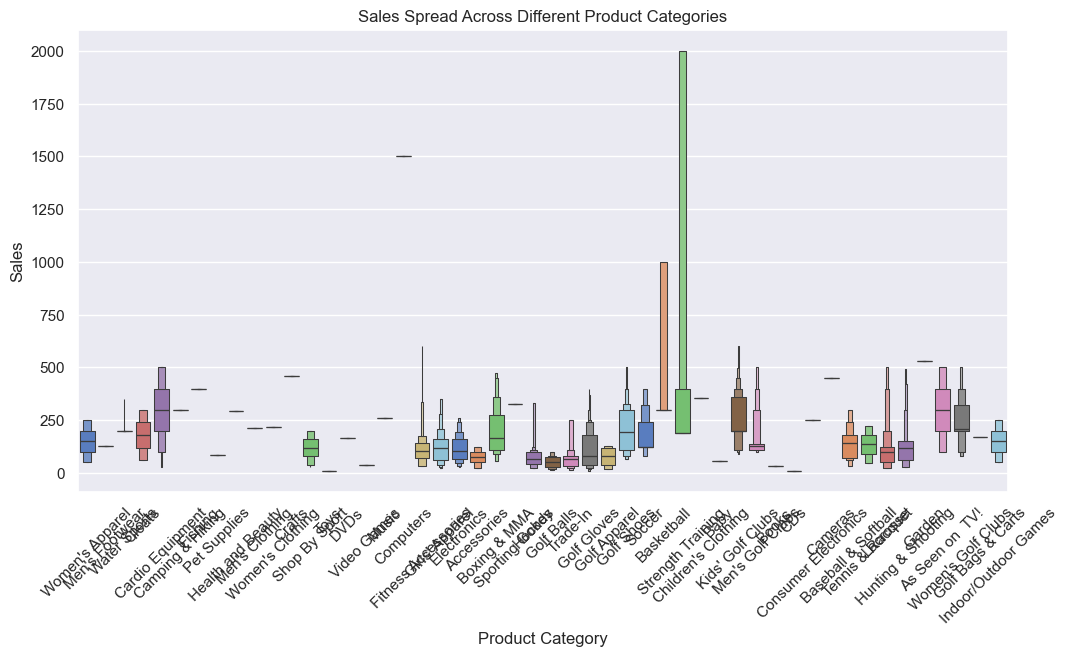

In [38]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df, x="Category Name", y="Sales", palette="muted")
plt.xticks(rotation=45)
plt.title("Sales Spread Across Different Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Sales")
plt.show()


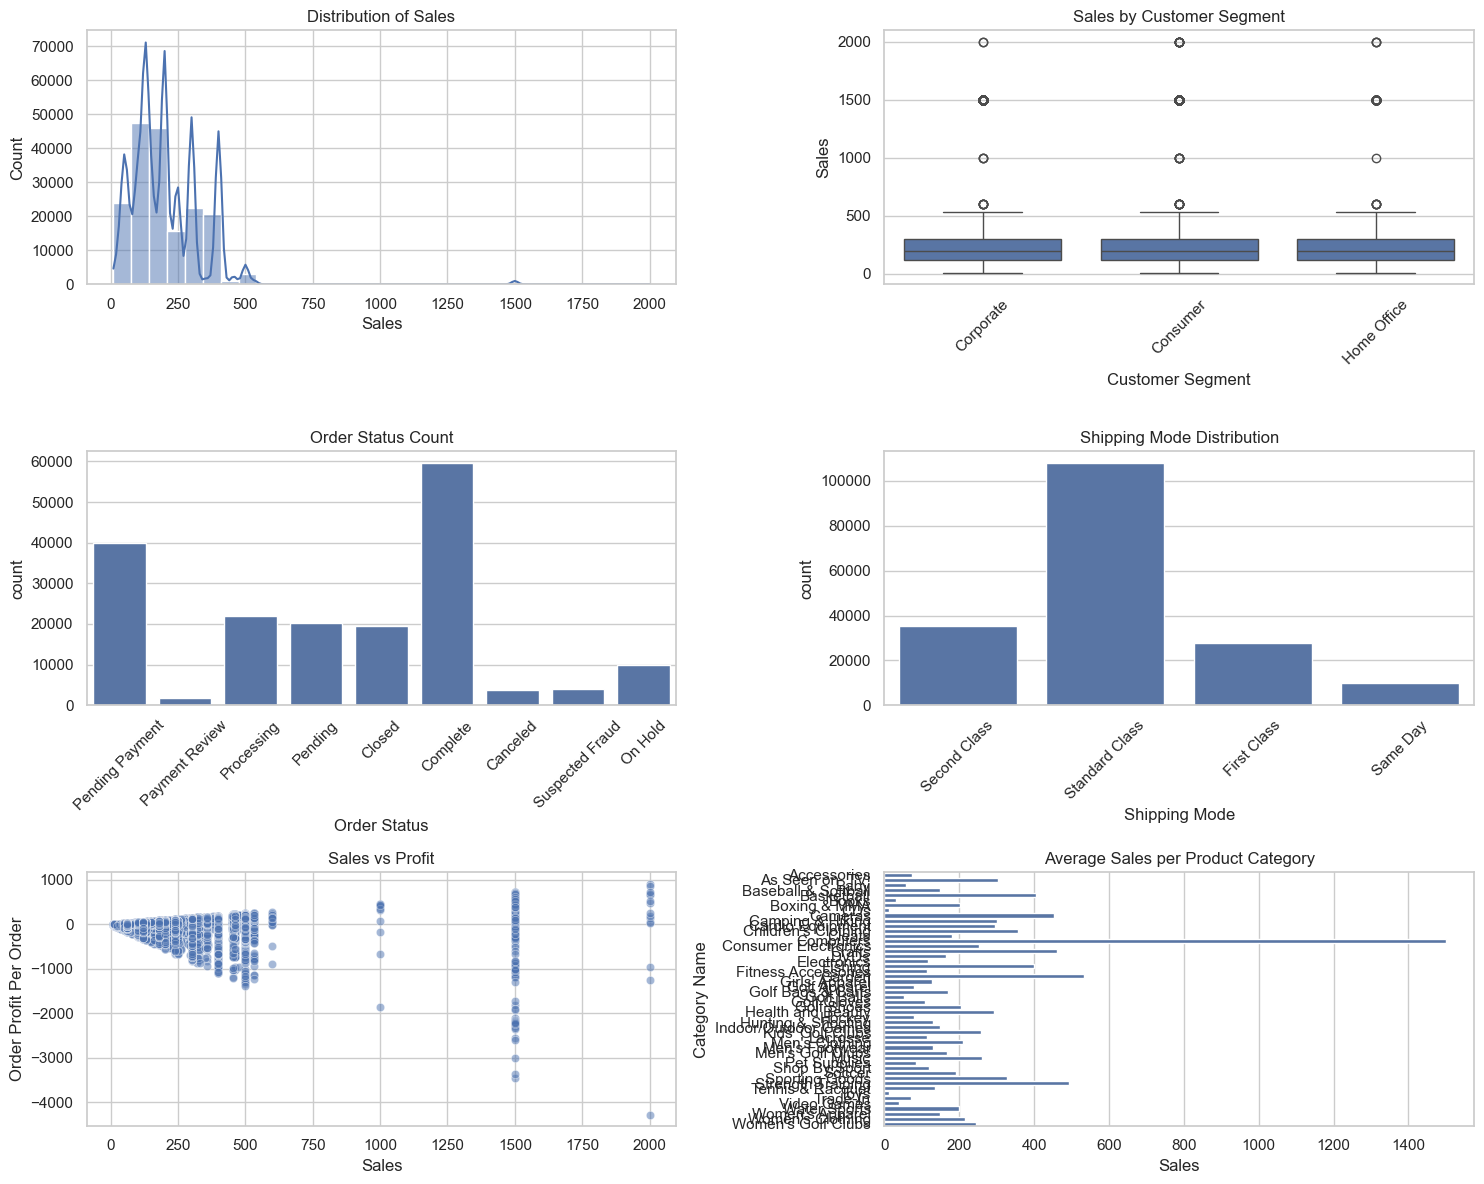

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "Merged_Sales_Inventory.csv"
df = pd.read_csv(file_path)

# Set plot style
sns.set_style("whitegrid")

# Create subplots for different types of visualizations
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# 1. Sales distribution
sns.histplot(df['Sales'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Sales')

# 2. Sales per customer segment
sns.boxplot(x='Customer Segment', y='Sales', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Sales by Customer Segment')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Order Status count
sns.countplot(x='Order Status', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Order Status Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Shipping mode distribution
sns.countplot(x='Shipping Mode', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Shipping Mode Distribution')
axes[1, 1].tick_params(axis='x', rotation=45)

# 5. Profit vs Sales scatter plot
sns.scatterplot(x='Sales', y='Order Profit Per Order', data=df, alpha=0.5, ax=axes[2, 0])
axes[2, 0].set_title('Sales vs Profit')

# 6. Average sales per product category
df_grouped = df.groupby('Category Name')['Sales'].mean().reset_index()
sns.barplot(x='Sales', y='Category Name', data=df_grouped, ax=axes[2, 1])
axes[2, 1].set_title('Average Sales per Product Category')

plt.tight_layout()
plt.show()


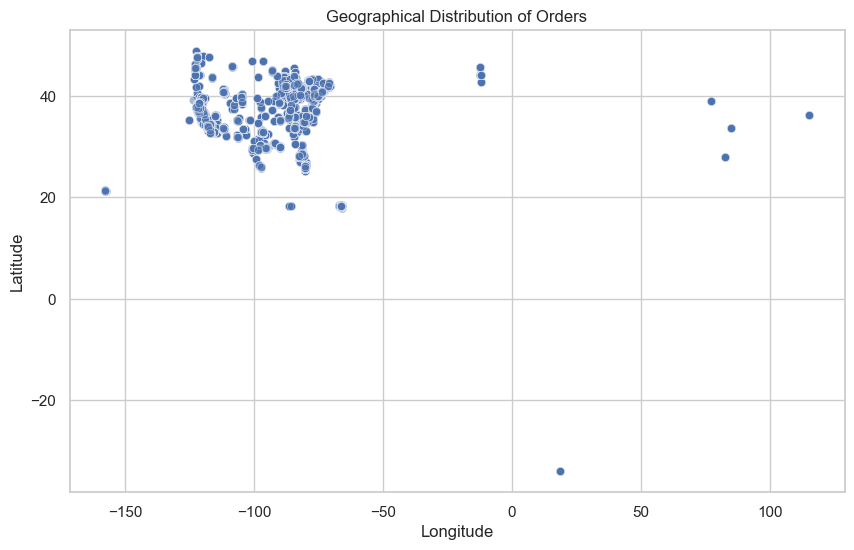

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "Merged_Sales_Inventory.csv"
df = pd.read_csv(file_path)

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Convert date column to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')

# Create scatter plot for geographical distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=df, alpha=0.5)
plt.title('Geographical Distribution of Orders')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


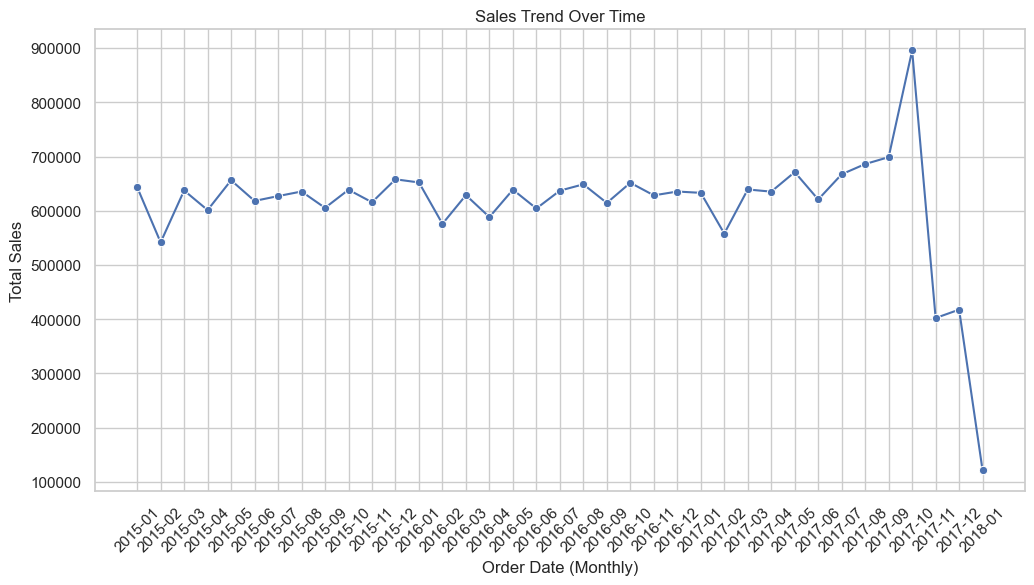

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "Merged_Sales_Inventory.csv"
df = pd.read_csv(file_path)

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Convert date column to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')

# Group by month and sum sales
df_time_series = df.groupby(df['order date (DateOrders)'].dt.to_period('M'))['Sales'].sum().reset_index()
df_time_series['order date (DateOrders)'] = df_time_series['order date (DateOrders)'].astype(str)

# Create line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='order date (DateOrders)', y='Sales', data=df_time_series, marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date (Monthly)')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


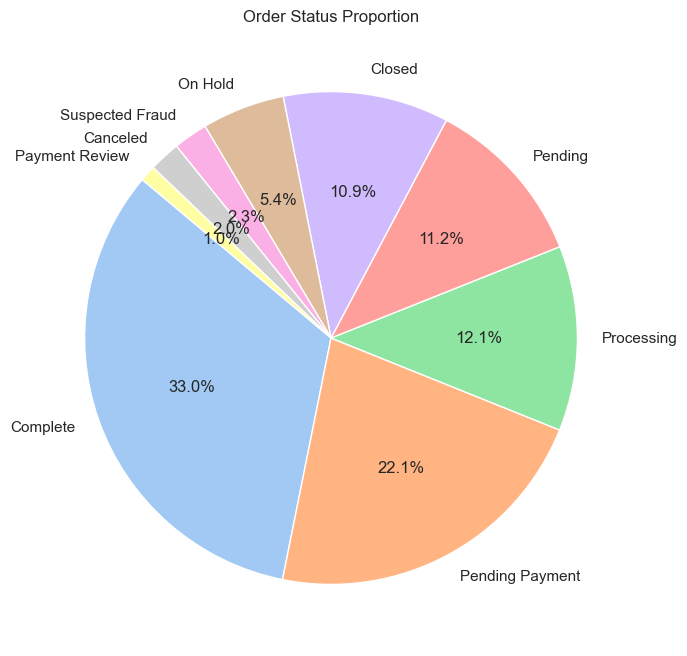

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "Merged_Sales_Inventory.csv"
df = pd.read_csv(file_path)

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Convert date column to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')

# Get order status counts
order_status_counts = df['Order Status'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(order_status_counts, labels=order_status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Order Status Proportion')
plt.show()


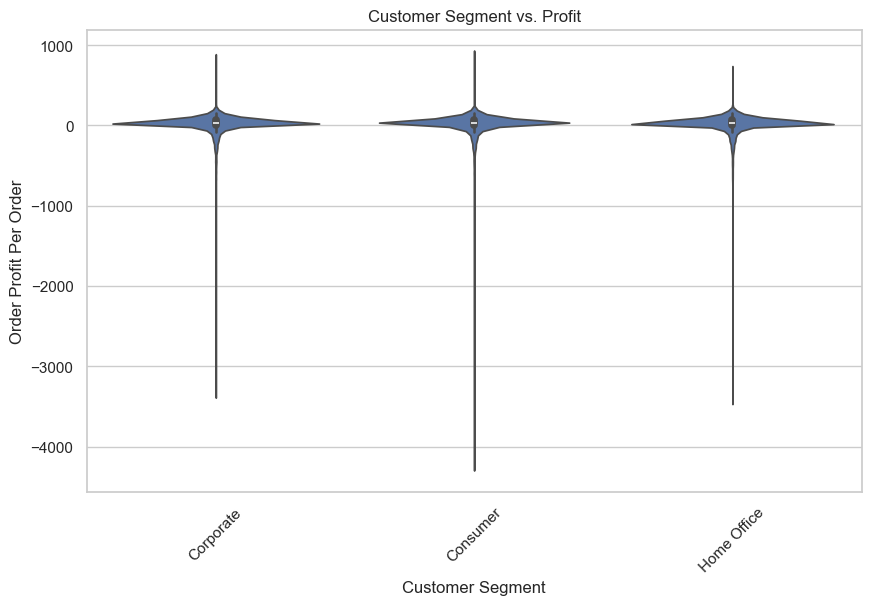

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "Merged_Sales_Inventory.csv"
df = pd.read_csv(file_path)

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Convert date column to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')

# Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Customer Segment', y='Order Profit Per Order', data=df)
plt.title('Customer Segment vs. Profit')
plt.xlabel('Customer Segment')
plt.ylabel('Order Profit Per Order')
plt.xticks(rotation=45)
plt.show()


C:\Users\sandi\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sandi\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


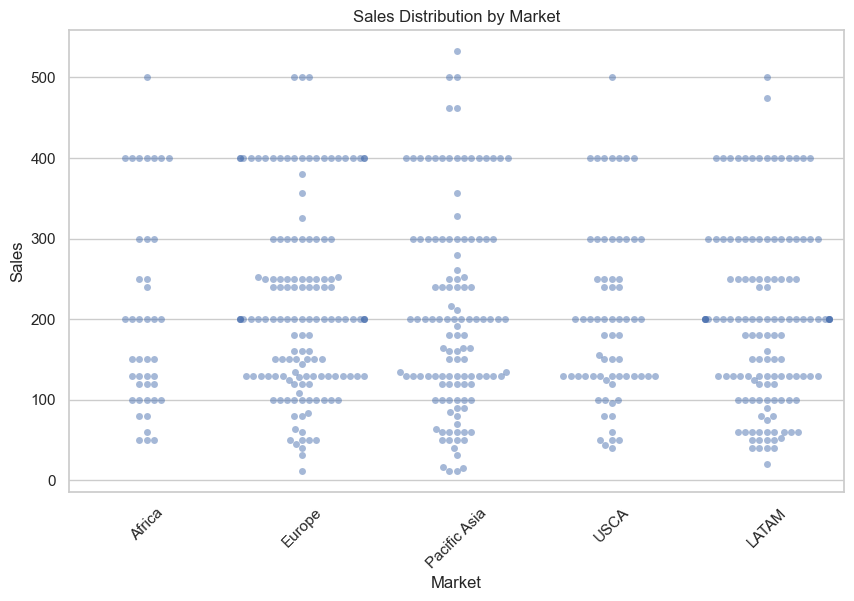

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "Merged_Sales_Inventory.csv"
df = pd.read_csv(file_path)

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Convert date column to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')

# Sample 500 data points to avoid overcrowding
df_sample = df.sample(500, random_state=42)

# Create swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Market', y='Sales', data=df_sample, alpha=0.5)
plt.title('Sales Distribution by Market')
plt.xlabel('Market')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


C:\Users\sandi\AppData\Local\Temp\ipykernel_9592\3756332594.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Scheduled', 'Real'], y=[avg_scheduled, avg_real], palette='coolwarm')


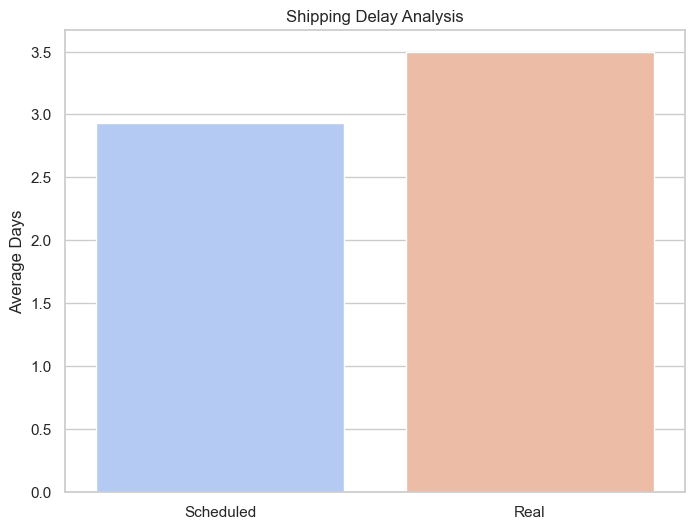

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "Merged_Sales_Inventory.csv"
df = pd.read_csv(file_path)

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Convert date column to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')

# Calculate shipping delay
df['Shipping Delay'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']

# Compute average scheduled and real shipping times
avg_scheduled = df['Days for shipment (scheduled)'].mean()
avg_real = df['Days for shipping (real)'].mean()

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Scheduled', 'Real'], y=[avg_scheduled, avg_real], palette='coolwarm')
plt.title('Shipping Delay Analysis')
plt.ylabel('Average Days')
plt.show()


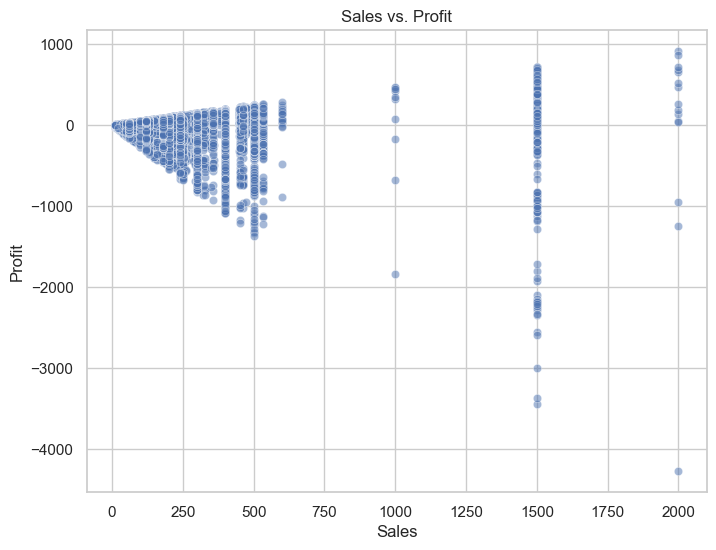

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "Merged_Sales_Inventory.csv"
df = pd.read_csv(file_path)

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Convert date column to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')

# Create a single scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sales', y='Order Profit Per Order', data=df, alpha=0.5)
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


C:\Users\sandi\AppData\Local\Temp\ipykernel_9592\3137262573.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Product Name', x='Sales', data=top_products, palette='coolwarm')


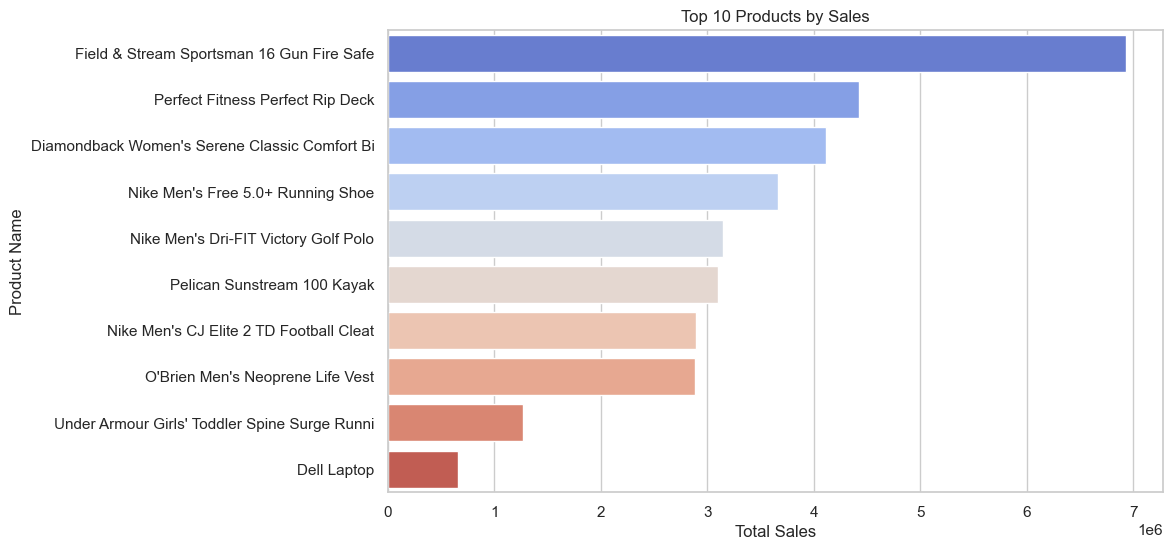

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "Merged_Sales_Inventory.csv"
df = pd.read_csv(file_path)

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Convert date column to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')

# Get top 10 products by sales
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y='Product Name', x='Sales', data=top_products, palette='coolwarm')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()


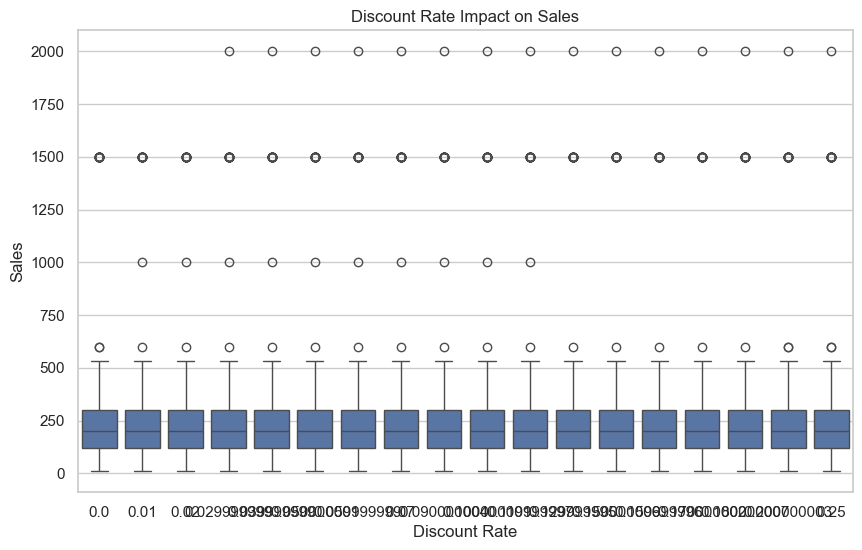

In [64]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "Merged_Sales_Inventory.csv"
df = pd.read_csv(file_path)

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Convert date column to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Order Item Discount Rate', y='Sales', data=df)
plt.title('Discount Rate Impact on Sales')
plt.xlabel('Discount Rate')
plt.ylabel('Sales')
plt.show()



<Figure size 1200x600 with 0 Axes>

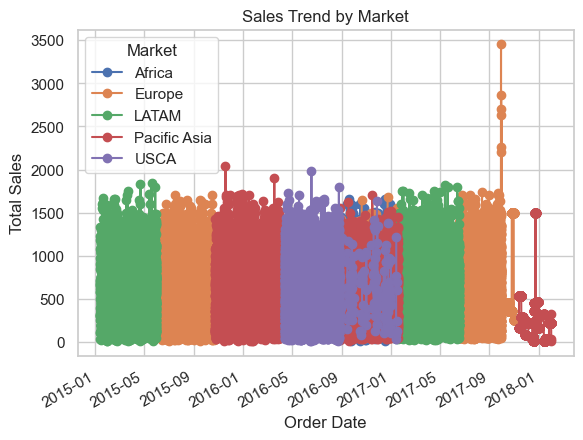

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "Merged_Sales_Inventory.csv"
df = pd.read_csv(file_path)

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Convert date column to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')

# Group by date and market, then sum sales
df_market_trend = df.groupby(['order date (DateOrders)', 'Market'])['Sales'].sum().reset_index()

# Pivot table for plotting
df_market_trend = df_market_trend.pivot(index='order date (DateOrders)', columns='Market', values='Sales')

# Create the line plot
plt.figure(figsize=(12, 6))
df_market_trend.plot(marker='o')
plt.title('Sales Trend by Market')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.legend(title='Market')
plt.grid(True)
plt.show()


C:\Users\sandi\AppData\Local\Temp\ipykernel_9592\1117880797.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Order Region', data=df, palette='viridis')


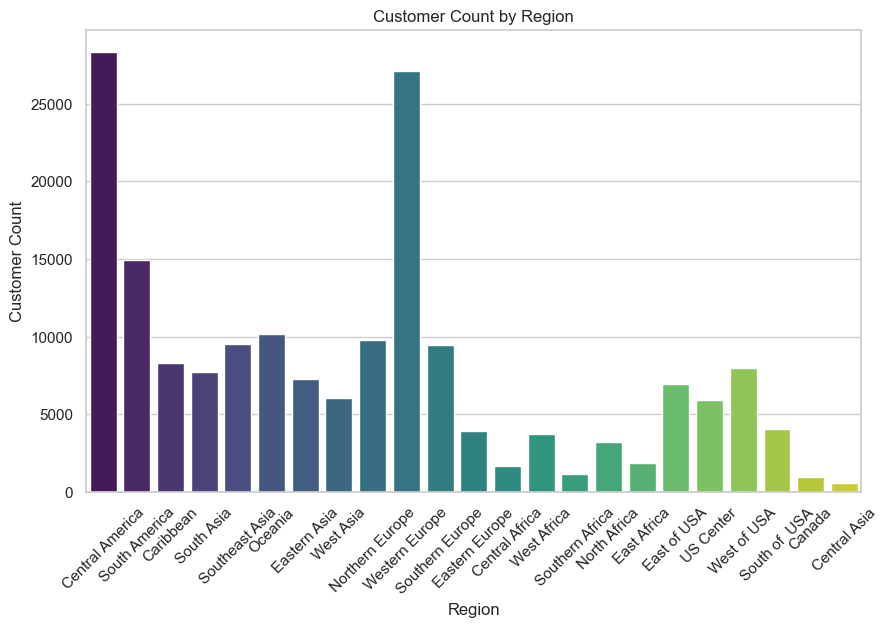

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "Merged_Sales_Inventory.csv"
df = pd.read_csv(file_path)

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Convert date column to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')

# Create count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Order Region', data=df, palette='viridis')
plt.title('Customer Count by Region')
plt.xlabel('Region')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.show()
